# Prova Data Science Hackató Saló Ocupació

***1. Seleccionar un conjunt de dades, realitzar una neteja exhaustiva i duu a terme un EDA (Anàlisi Exploratòria de Dades). Es requereix que realitzis almenys dues visualitzacions que descriuen la informació continguda en les teves dades, destacant insights clau i tendències observades.***

He escollit treballar amb els resultats de l'enquesta sobre la bretxa digital a la ciutat de Barcelona (https://opendata-ajuntament.barcelona.cat/data/ca/dataset/enquesta-escletxa-digital). També he consultat el *Qüestionari*: 20201008_Annex_I_Questionari-def.pdf (barcelona.cat) i *Variables i valors:* Informacio_de_variables_i_valors.pdf (barcelona.cat)

Trobo que aquesta enquesta sobre la bretxa digital era el conjunt de dades més impactant i interessant, sobretot en el context dels reptes urbans moderns. Entendre la desigualtat digital és fonamental per a les polítiques destinades a millorar l'accés a la tecnologia i l'educació, que s'han convertit en essencials per a la inclusió econòmica i social. Els coneixements d'aquesta anàlisi podrien influir en les decisions sobre l'assignació de recursos, les millores de la infraestructura d'Internet i els programes d'alfabetització digital a la nostra ciutat.

La mostra conté 2.542 enquestes de població de Barcelona de 16 anys i més que es va dur a terme entre el 15 d’octubre al 2 de novembre de 2020 per l'Institut Opinòmetre.

La metodologia empleada va ser principalment entrevista telefònica amb suport informàtic (CATI) + entrevistes personals amb suport informàtic (CAPI) per al tancament d’algunes quotes. El mostreig es aleatori i estratificat. Els estrats es formen per l’encreuament del territori amb el sexe i l’edat dels ciutadans. S’apliquen quotes per cadascun d’aquests estrats. A més, s’estableixen quotes per nacionalitat i persones en situació d’atur en cada zona.

Ara que ja sabem amb quines dades anem a treballar, som-hi!

In [1]:
import pandas as pd
# Importem les dades
df = pd.read_csv(r'C:\Users\soled\OneDrive\Escritorio\Hackathon IT Acad\escletxa_digital.csv')

# Imprimim l'informacio del DF 
df.info()

# Mirem les primeres files del DataFrame
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Columns: 135 entries, ID to Pes
dtypes: float64(103), int64(31), object(1)
memory usage: 2.6+ MB
   ID  METODE      DATA  Codi_Districte          Nom_Districte  F0  F1  F2  \
0   5       1  20201015               2               Eixample   3   1   1   
1   6       1  20201015               5  Sarrià - Sant Gervasi   3   1   1   
2   9       1  20201015               7       Horta - Guinardó   3   1   1   
3  12       1  20201015               2               Eixample   1   1   1   
4  13       1  20201015               1           Ciutat Vella   2   1   1   

   RENDA  Q1  ...  P5A_15rec  P5A_16rec  P5A_17rec  P5A_18rec  P5A_19rec  \
0      3   1  ...        1.0        1.0        2.0        1.0        1.0   
1      5   2  ...        1.0        1.0        2.0        2.0        1.0   
2      2   2  ...        1.0        1.0        2.0        2.0        1.0   
3      3   2  ...        1.0        2.0        2.0      

In [2]:
# El conjunt de dades és dens amb 135 columns i 2542 linees, té una majoria de dades numèriques (Float103), seguit de Int64(31) i object(1). 
# El nom de les columnes no són molt explicatives, afegiré el nom de les variables corresponent a les preguntes que toquen a la majoria dels enquestats tot i segons el PDF informacio_de_variables_i_valors. 

df.rename(columns={
    'METODE':'metodologia',
    'DATA':'data_enquesta',
    'HORA':'hora_enquesta',
    'EDAT':'grup_edat',
    'Q2':'edat',
    'Codi_Districte':'codi_districte',
    'Nom_Districte':'nom_districte',
    'F0':'llengua_enquesta',
    'F1': 'resideix_a_bcn',
    'F2': 'empradonament',
    'Q1': 'sexe',
    'RENDA':'renda',
    'ID4': 'nacionalitat',
    'ID4_PAIS':'pais',
    'ID5': 'situacio_laboral',
    'ID7': 'composicio_familiar',
    'ID8': 'nombre_total_llar',
    'ID9': 'menors_16',
    'P1': 'internet_llar',
    'P1A':'tipus_connexio_llar',
    'Q1A':'qualitat_connexio_llar',
    'P1B': 'motiu_no_connexio_llar',
    'P2_1':'smartphone_llar',
    'P2_2':'tauleta_llar',
    'P2_3':'portatil_llar',
    'P2_4':'ordinador_taula_llar',
    'P2_5':'altres_dispositius_llar',
    'P2_6':'consoles_llar',
    'P2_7': 'tv_llar',
    'P2_5B': 'predominant_altres',
    'P2': 'dispositiu_internet_llar',
    'P2A':'dades_smartphone',
    'P2B':'no_dades_smartphone',
    'P3_1':'correu_personal',
    'P3_2':'correu_professional',
    'P3_3':'correu_indiferent',
    'P3_0':'no_correu',
    'P3_95':'correu_altres_repostes',
    'P3_98':'correu_no_sap',
    'P3_99':'correu_no_contesta',
    'P4':'ultima_connexio_internet',
    'P6':'nivell_us_post_covid',
    'P7':'utilitzacio_wifi_ciutat',
    'Q8':'valoracio_wifi_ciutat',
    'P9':'treball_des_de_casa_confinament',
    'P10':'menors_educacio_online',
    'P12':'serveis_medics_online',
    'Q12':'valoracio_serveis_medics_online',
    'P13':'internet_partipacio_ciutadana',
    'ID10':'nivell_formacio_acabat',
    'ID11':'discapacitat_dificultat_us_internet',
    'P14':'si_dificultat_us_internet',
    'P14_1cod':'tipus_eines_superar',
    'P14_2cod':'rao_falta_eines',
    'P5A_1rec':'utilitza_correu_electronic',
    'P5A_2rec':'utilitza_app_missatgeria',
    'P5A_3rec':'realitza_trucades_internet',
    'P5A,4rec':'utilitza_xarxes_socials',
    'P5A_5rec':'crea_contingut_online',
    'P5A_6rec':'jugar_jocs_online',
    'P5A_7rec':'llegir_noticies_online',
    'P5A_8rec':'buscar_informacio_webs_administracions',
    'P5A_9rec':'buscar_informacio_salut_online',
    'P5A_10rec':'comprar_vendre_online',
    'P5A_11rec':'consultar_comptes_bancaris_online',
    'P5A_12rec':'fet_cursos_formacio_distancia_online',
    'P5A_13rec':'llogar_online',
    'P5A_14rec':'buscar_treball_online',
    'P5A_15rec':'demanar_cita_metge_online',
    'P5A_16rec':'realitzat_tramit_administracio_online',
    'P5A_17rec':'compartir_bens_serveis_online',
    'P5A_18rec':'participat_moviments_socials_online',
    'P5A_19rec':'consumir_lleure_cultural_pagament',
    'P5A_20rec':'consumir_lleure_cultural_lliure',
    'P2_LLAR':'numero_dispositius_llar',
    'Longitud':'longitud',
    'Latitud':'latitud'

}, inplace=True)

# Verifiquem els cambis
df.head()

,ID,metodologia,data_enquesta,codi_districte,nom_districte,llengua_enquesta,resideix_a_bcn,empradonament,renda,sexe,...,demanar_cita_metge_online,realitzat_tramit_administracio_online,compartir_bens_serveis_online,participat_moviments_socials_online,consumir_lleure_cultural_pagament,consumir_lleure_cultural_lliure,numero_dispositius_llar,longitud,latitud,Pes
0,5,1,20201015,2,Eixample,3,1,1,3,1,...,1.0,1.0,2.0,1.0,1.0,1.0,8.0,2.156566,41.382082,0.741578
1,6,1,20201015,5,Sarrià - Sant Gervasi,3,1,1,5,2,...,1.0,1.0,2.0,2.0,1.0,1.0,17.0,2.140351,41.405319,0.572459
2,9,1,20201015,7,Horta - Guinardó,3,1,1,2,2,...,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.153140,41.425456,1.740063
3,12,1,20201015,2,Eixample,1,1,1,3,2,...,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.177373,41.406421,0.918977
4,13,1,20201015,1,Ciutat Vella,2,1,1,3,1,...,1.0,2.0,2.0,2.0,2.0,1.0,7.0,2.172285,41.384083,0.923780


Les columnes han canviat de nom correctament, i ràpidament es pot veure que ens falten dades. 

<Axes: >

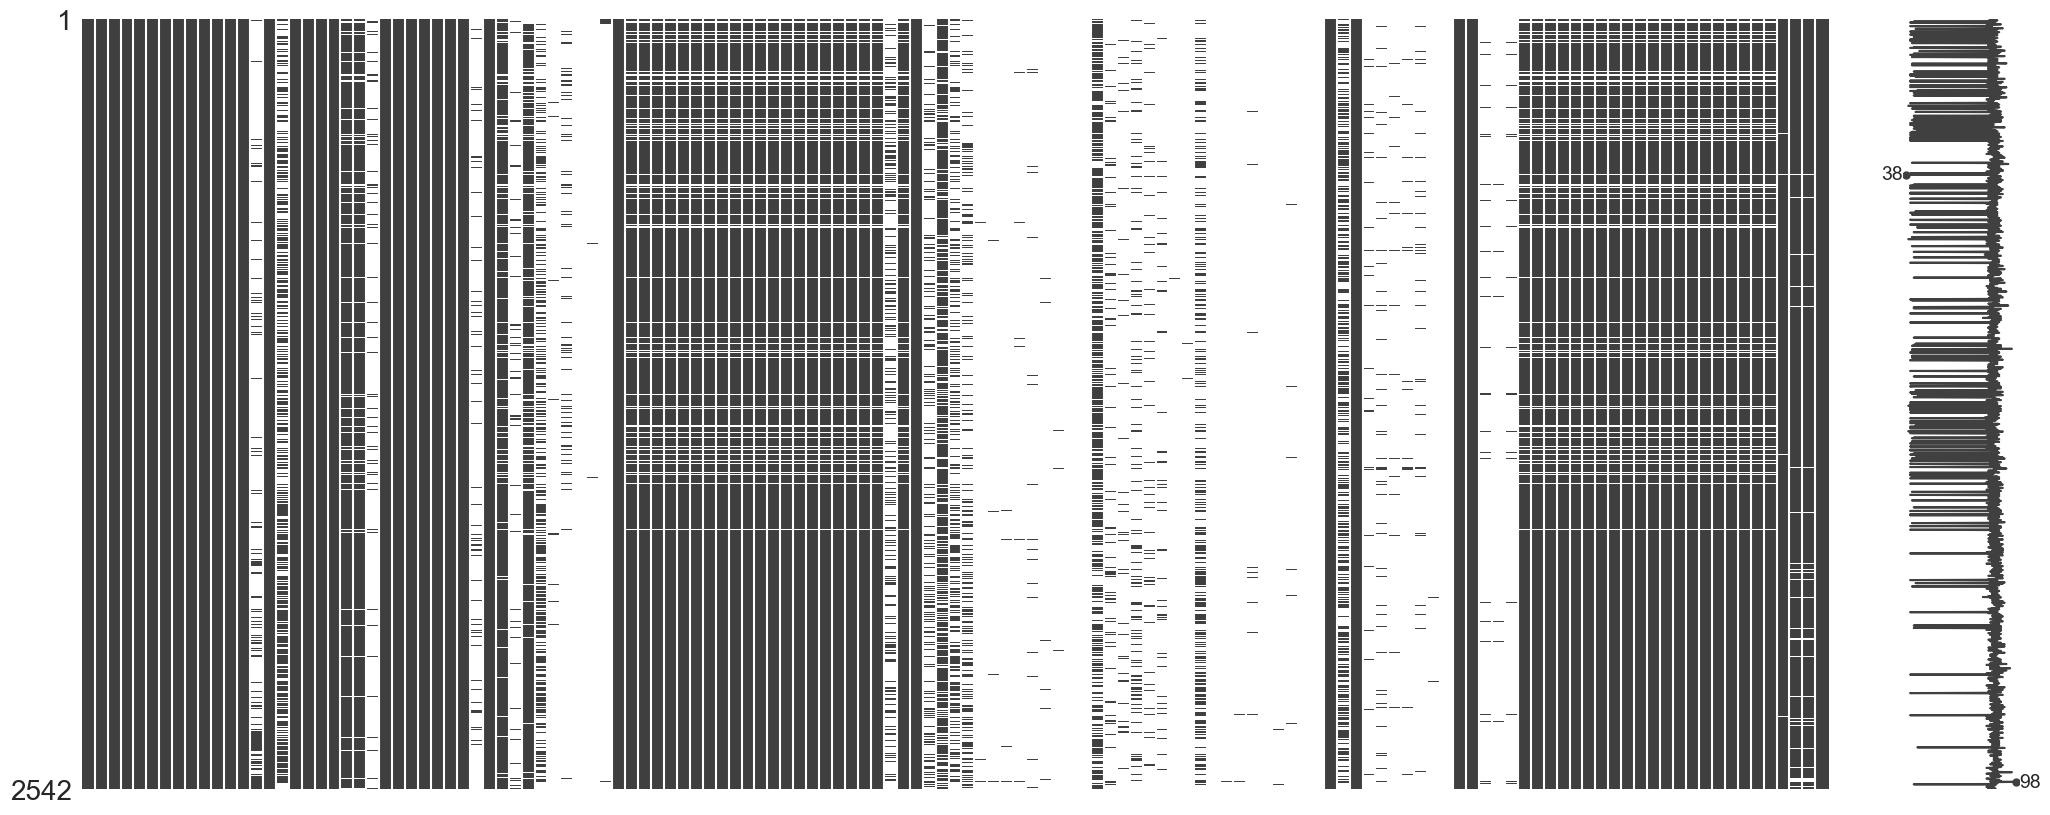

In [3]:
# Visualitzem les columnes que no tenen dades amb un matrix:
import missingno as msno
msno.matrix(df)

Com aquest conjunt de dades té la particularitat de ser una enquesta, cada ID és la resposta d'una persona. L'enquesta està dissenyada amb una barreja de preguntes condicionals, el que significa que algunes preguntes només són rellevants en funció de les respostes anteriors. Com a resultat, això provoca respostes no aplicables als enquestats, representades com a <Nan> al conjunt de dades. En aquest cas, no sembla pertinent eliminar les columnes que contenent poca informació, ni fer calculs de mitjana per emplenar el conjunt de dades.

Tot i que una gran part dels valors <Nan> indiquen preguntes no aplicables, el conjunt de dades també conté dades que falten realment, perquè els enquestats no van respondre una pregunta que els era rellevant. Aquesta opció ja estava pensada en l'enquesta i correspond a les respostes amb '99' en les diferents columnes. 


Com l'enquesta ha estat dividida en 3 grand parts, dividiré les informacions personals amb els 3 grands temes en different DF per facilitar l'exploració de les dades. 
Soc conscient que si haguessi guardat el nom original de les variables, aquesta divisió per themes és podria fer més ràpidament. Però com ja les tinc, ho faré amb els noms personalizats. 

In [4]:
# Dividim les variables en 3 grups
llar_i_dispositius = ['ID', 'codi_districte','renda','sexe','grup_edat','nacionalitat','pais','nombre_total_llar','situacio_laboral','composicio_familiar','menors_16','nivell_formacio_acabat','discapacitat_dificultat_us_internet','si_dificultat_us_internet','tipus_eines_superar','rao_falta_eines','dispositiu_internet_llar','internet_llar','tipus_connexio_llar','qualitat_connexio_llar','motiu_no_connexio_llar','numero_dispositius_llar','smartphone_llar','tauleta_llar','portatil_llar','ordinador_taula_llar','consoles_llar','tv_llar','altres_dispositius_llar','predominant_altres','dades_smartphone','no_dades_smartphone','Pes']

internet = ['ID','codi_districte','renda','sexe','edat','grup_edat','nacionalitat','pais','nombre_total_llar','situacio_laboral','composicio_familiar','menors_16','nivell_formacio_acabat','discapacitat_dificultat_us_internet','si_dificultat_us_internet','tipus_eines_superar','rao_falta_eines','correu_personal','correu_professional','correu_indiferent','no_correu','correu_altres_repostes','correu_no_sap','correu_no_contesta','ultima_connexio_internet','P5A_1','P5A_2','P5A_3','P5A_4','P5A_5','P5A_6','P5A_7','P5A_8','P5A_9','P5A_10','P5A_11','P5A_12','P5A_13','P5A_14','P5A_15','P5A_16','P5A_17','P5A_18','P5A_19','P5A_20','P5A_18_cod','nivell_us_post_covid','utilitzacio_wifi_ciutat','valoracio_wifi_ciutat','P8B', 'utilitza_correu_electronic','utilitza_app_missatgeria','realitza_trucades_internet','P5A_4rec','crea_contingut_online','jugar_jocs_online','llegir_noticies_online','buscar_informacio_webs_administracions','buscar_informacio_salut_online','comprar_vendre_online','consultar_comptes_bancaris_online','fet_cursos_formacio_distancia_online','llogar_online','buscar_treball_online','demanar_cita_metge_online','realitzat_tramit_administracio_online','compartir_bens_serveis_online','participat_moviments_socials_online','consumir_lleure_cultural_pagament','consumir_lleure_cultural_lliure','Pes'] 

covid_i_formacio = ['ID','codi_districte','renda','sexe','edat','grup_edat','nacionalitat','pais','nombre_total_llar','situacio_laboral','composicio_familiar','menors_16','nivell_formacio_acabat','discapacitat_dificultat_us_internet','si_dificultat_us_internet','tipus_eines_superar','rao_falta_eines','treball_des_de_casa_confinament','P9B','menors_educacio_online','P10B_1','P10B_2','P10B_3','P10B_4','P10B_5','P10B_6','P10B_95','P10B_98','P10B_99','P11_0','P11_1','P11_2','P11_3','P11_4','P11_5','P11_98','P11_99','P11B','P11C_1','P11C_2','P11C_3','P11C_4','P11C_5','P11C_6','P11C_95','P11C_98','P11C_99','serveis_medics_online','valoracio_serveis_medics_online','internet_partipacio_ciutadana','P13B_1','P13B_2','P13B_3','P13B_4','P13B_5','P13B_98','P13B_99','Pes']

He decidit no incloure les següents variables en els nous DataFrames, ja que no aporten informació rellevant o bé són redundants en relació amb altres variables del conjunt de dades:

-'resideix_a_bcn': Totes les respostes de l'enquesta corresponen a persones que resideixen a Barcelona, per tant, aquesta variable sempre té el valor "Sí" i no ofereix cap diferenciació.

-'empradonament': Totes les persones enquestades estan empadronades a Barcelona, fent que aquesta variable sigui constant i no aporti valor analític.

-'data_enquesta': Sabem que l'enquesta es va dur a terme entre el 15 d'octubre i el 2 de novembre de 2020, per la qual cosa aquesta variable no aporta informació significativa per a l'anàlisi, ja que no hi ha variació substancial entre els dies, mesos o anys.

-'nom_districte': Ja disposem de la informació del districte a través de la variable codi_districte, que codifica aquesta mateixa informació. 

-'llengua_enquesta': La llengua en què es va realitzar l'enquesta (català o castellà) no afecta les respostes i, per tant, no aporta informació rellevant per a l'anàlisi de les dades.

-'longitud' i 'latitud': Les coordenades GPS específiques dels enquestats no ofereixen informació addicional rellevant, ja que ja tenim la ubicació mitjançant el codi de districte.

-'edat': Aquesta variable és redundant, ja que disposem de la variable grup_edat, que classifica les edats en intervals rellevants per a l'anàlisi.

In [5]:
# Creació dels 3 nous DFs
df_llar_i_dispositius = df[llar_i_dispositius]
df_internet = df[internet]
df_covid_i_formacio = df[covid_i_formacio]

In [8]:
# Per facilitar poder treballar amb ells més tard, me'ls guardo com arxius CSVs
df_llar_i_dispositius.to_csv('llar_i_dispositius.csv',index=False)
df_internet.to_csv('internet.csv',index=False)
df_covid_i_formacio.to_csv('covid_i_formacio.csv',index=False)

Ara que ja els tenim i abans de pasar a l'EDA, vull mapar els codis de resposta de l'enquesta amb les etiquetes descriptives de l'informacio_de_variables.csv.
No només facilitará la comprensió i l'anàlisi de les dades, sinó que també contribuiara a una comunicació més clara dels resultats i a la identificació de tendències i patrons rellevants. L'idea es poder millorar significativament la qualitat i la utilitat de les conclusions obtingudes.

Com sempre que vaig al carrer veig tothom mirant el mobil, o si miro Whatsapp veig a tothom en línia, si vaig a un cafè, algú està a l'ordinador, tot aixó em dona la sensació que tothom està sempre conectat. Per això, he decidit que vull focalitzar el meu EDA a l'accés internet a la llar i als dispositius dels habitants de Barcelona, per veure que em poden dir les dades. 

In [9]:
# Mapeig de codis a etiquetes per 'codi_districte'
codi_districte_map = {
    1: "Ciutat Vella",
    2: "Eixample",
    3: "Sants - Montjuïc",
    4: "Les Corts",
    5: "Sarrià - Sant Gervasi",
    6: "Gràcia",
    7: "Horta - Guinardó",
    8: "Nou Barris",
    9: "Sant Andreu",
    10: "Sant Martí"
}

# Mapeig de codis a etiquetes per 'renda'
renda_map = {
    1: "Baixa",
    2: "Mitja-baixa",
    3: "Mitja",
    4: "Mitja-alta",
    5: "Alta"
}

# Mapeig de codis a etiquetes per 'sexe'
sexe_map = {
    1: "Home",
    2: "Dona",
    3: "No binari"
}

# Mapeig de codis a etiquetes per 'grup_edat'
grup_edat_map = {
    1: "De 16 a 24 anys",
    2: "De 25 a 34 anys",
    3: "De 35 a 44 anys",
    4: "De 45 a 54 anys",
    5: "De 55 a 64 anys",
    6: "De 65 a 74 anys",
    7: "De 75 anys o més"
}

# Mapeig de codis a etiquetes per 'nacionalitat'
nacionalitat_map = {
    1: "Espanyola",
    2: "Espanyola i altres",
    3: "Estrangera"
}

# Mapeig de codis a etiquetes per 'pais'
pais_map = {
    4.00: "Afganistan",
    8.00: "Albània",
    12.00: "Algèria",
    16.00: "Samoa Nord-americana",
    20.00: "Andorra",
    24.00: "Angola",
    28.00: "Antigua i Barbuda",
    31.00: "Azerbaidjan",
    32.00: "Argentina",
    36.00: "Austràlia",
    40.00: "Àustria",
    44.00: "Bahames",
    48.00: "Bahrain",
    50.00: "Bangla Desh",
    51.00: "Armènia",
    52.00: "Barbados",
    56.00: "Bèlgica",
    60.00: "Illes Bermudes",
    64.00: "Bhutan",
    68.00: "Bolívia",
    70.00: "Bòsnia i Hercegovina",
    72.00: "Botswana",
    76.00: "Brasil",
    84.00: "Belize",
    90.00: "Salomó",
    92.00: "Illes Verges Britàniques",
    96.00: "Brunei",
    100.00: "Bulgària",
    104.00: "Myanma",
    108.00: "Burundi",
    112.00: "Bielorrússia",
    116.00: "Cambodja",
    120.00: "Camerun",
    124.00: "Canadà",
    132.00: "Cap Verd",
    136.00: "Illes Caiman",
    140.00: "República Centrafricana",
    144.00: "Sri Lanka",
    148.00: "Txad",
    152.00: "Xile",
    156.00: "Xina",
    158.00: "Taiwan",
    170.00: "Colòmbia",
    174.00: "Comores",
    175.00: "Mayotte",
    178.00: "Congo",
    180.00: "Zaire",
    184.00: "Illes Cook",
    188.00: "Costa Rica",
    191.00: "Croàcia",
    192.00: "Cuba",
    196.00: "Xipre",
    203.00: "República Txeca",
    204.00: "Benín",
    208.00: "Dinamarca",
    212.00: "Dominica",
    214.00: "República Dominicana",
    218.00: "Equador",
    222.00: "Salvador, el",
    226.00: "Guinea Equatorial",
    231.00: "Etiòpia",
    232.00: "Eritrea",
    233.00: "Estònia",
    234.00: "Illes Fèroe",
    238.00: "Illes Falkland/Illes Malvines",
    242.00: "Fiji",
    246.00: "Finlàndia",
    248.00: "Illes Àland",
    250.00: "França",
    254.00: "Guaiana Francesa",
    258.00: "Polinèsia Francesa",
    262.00: "Djibouti",
    266.00: "Gabon",
    268.00: "Geòrgia",
    270.00: "Gàmbia",
    275.00: "Palestina",
    276.00: "Alemanya",
    288.00: "Ghana",
    292.00: "Gibraltar",
    296.00: "Kiribati",
    300.00: "Grècia",
    304.00: "Grenlàndia",
    308.00: "Grenada",
    312.00: "Guadeloupe",
    316.00: "Guam",
    320.00: "Guatemala",
    324.00: "Guinea",
    328.00: "Guyana",
    332.00: "Haití",
    336.00: "Vaticà- Santa Seu",
    340.00: "Hondures",
    344.00: "Hong Kong",
    348.00: "Hongria",
    352.00: "Islàndia",
    356.00: "Índia",
    360.00: "Indonèsia",
    364.00: "Iran",
    368.00: "Iraq",
    372.00: "Irlanda",
    376.00: "Israel",
    380.00: "Itàlia",
    384.00: "Costa d'Ivori",
    388.00: "Jamaica",
    392.00: "Japó",
    398.00: "Kazakhstan",
    400.00: "Jordània",
    404.00: "Kenya",
    408.00: "República Democràtica Popular de Corea",
    410.00: "República de Corea",
    414.00: "Kuwait",
    417.00: "Kirguizistan",
    418.00: "Laos",
    422.00: "Líban",
    426.00: "Lesotho",
    428.00: "Letònia",
    430.00: "Libèria",
    434.00: "Líbia",
    438.00: "Liechtenstein",
    440.00: "Lituània",
    442.00: "Luxemburg",
    446.00: "Macau",
    450.00: "Madagascar",
    454.00: "Malawi",
    458.00: "Malàisia",
    462.00: "Maldives",
    466.00: "Mali",
    470.00: "Malta",
    474.00: "Martinica",
    478.00: "Mauritània",
    480.00: "Maurici",
    484.00: "Mèxic",
    492.00: "Mònaco",
    496.00: "Mongòlia",
    498.00: "Moldàvia",
    499.00: "Montenegro",
    500.00: "Montserrat",
    504.00: "Marroc",
    508.00: "Moçambic",
    512.00: "Oman",
    516.00: "Namíbia",
    520.00: "Nauru",
    524.00: "Nepal",
    528.00: "Països Baixos",
    530.00: "Antilles Neerlandeses",
    533.00: "Aruba",
    540.00: "Nova Caledònia",
    548.00: "Vanuatu",
    554.00: "Nova Zelanda",
    558.00: "Nicaragua",
    562.00: "Níger",
    566.00: "Nigèria",
    570.00: "Niue",
    574.00: "Illa Norfolk",
    578.00: "Noruega",
    580.00: "Illes Mariannes del Nord",
    583.00: "Estats Federats de Micronèsia",
    584.00: "Illes Marshall",
    585.00: "Palau",
    586.00: "Pakistan",
    591.00: "Panamà",
    598.00: "Papua Nova Guinea",
    600.00: "Paraguai",
    604.00: "Perú",
    608.00: "Filipines",
    612.00: "Pitcairn",
    616.00: "Polònia",
    620.00: "Portugal",
    624.00: "Guinea Bissau",
    626.00: "Timor Oriental",
    630.00: "Puerto Rico",
    634.00: "Qatar",
    638.00: "Illa de la Reunió",
    642.00: "Romania",
    643.00: "Rússia",
    646.00: "Rwanda",
    652.00: "Saint Barthélemy",
    654.00: "Saint Helena",
    659.00: "Saint Cristopher i Nevis",
    660.00: "Anguilla",
    662.00: "Saint Lucia",
    663.00: "Saint Martin",
    666.00: "Saint Pierre i Miquelon",
    670.00: "Saint Vincent i les Grenadines",
    674.00: "San Marino",
    678.00: "Sao Tomé i Príncipe",
    682.00: "Aràbia Saudita",
    686.00: "Senegal",
    688.00: "Sèrbia",
    690.00: "Seychelles",
    694.00: "Sierra Leone",
    702.00: "Singapur",
    703.00: "Eslovàquia",
    704.00: "Vietnam",
    705.00: "Eslovènia",
    706.00: "Somàlia",
    710.00: "República de Sud-àfrica",
    716.00: "Zimbabwe",
    724.00: "Espanya",
    732.00: "Sàhara Occidental",
    736.00: "Sudan",
    740.00: "Surinam",
    744.00: "Illes de Svalbard i Jan Mayen",
    748.00: "Swazilàndia",
    752.00: "Suècia",
    756.00: "Suïssa",
    760.00: "Síria",
    762.00: "Tadjikistan",
    764.00: "Tailàndia",
    768.00: "Togo",
    772.00: "Tokelau",
    776.00: "Tonga",
    780.00: "Trinitat i Tobago",
    784.00: "Unió dels Emirats Àrabs",
    788.00: "Tunísia",
    792.00: "Turquia",
    795.00: "Turkmenistan",
    796.00: "Illes Turks i Caicos",
    798.00: "Tuvalu",
    800.00: "Uganda",
    804.00: "Ucraïna",
    807.00: "Macedònia",
    818.00: "Egipte",
    826.00: "Gran Bretanya",
    830.00: "Illes del Canal/Illes Anglonormandes",
    831.00: "Guernsey",
    832.00: "Jersey",
    833.00: "Illa de Man",
    834.00: "Tanzània",
    840.00: "Estats Units d'Amèrica",
    850.00: "Illes Verges Nord-americanes",
    854.00: "Burkina Faso",
    858.00: "Uruguai",
    860.00: "Uzbekistan",
    862.00: "Veneçuela",
    876.00: "Illes Wallis i Futuna",
    882.00: "Samoa Occidental",
    887.00: "Iemen",
    894.00: "Zàmbia"
}

# Mapeig de codis a etiquetes per 'situacio_laboral'
situacio_laboral_map = {
    1: "Ocupada",
    2: "Aturada",
    3: "Jubilada / Pensionista",
    4: "Tasques no remunerades",
    5: "Estudiant",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'composicio_familiar'
composicio_familiar_map = {
    1: "Unipersonal",
    2: "Multipersonal sense nucli",
    3: "Nuclear, en parella, sense fills",
    4: "Nuclear, en parella amb fills",
    5: "Nuclear, monoparental amb fills",
    6: "Nuclear 3 generacions"
}

# Mapeig de codis a etiquetes per 'internet_llar'
internet_llar_map = {
    1: "Sí",
    2: "No",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'tipus_connexio_llar'
tipus_connexio_llar_map = {
    1: "ADSL/VDSL / SDSL",
    2: "Fibra òptica",
    3: "Híbrid de fibra i coaxial (HFC)",
    4: "Internet radio/4G",
    95: "Altres sistemes",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'qualitat_connexio_llar'
qualitat_connexio_llar_map = {
    0: "Dolenta",
    10: "Molt bona",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'motiu_no_connexio_llar'
motiu_no_connexio_llar_map = {
    1: "No arriba ni la fibra ni ADSL/VDSL/SDSL/4G",
    2: "No em puc permetre pagar la connexió",
    3: "No tinc dispositius que es puguin connectar",
    4: "No cal, em connecto mitjançant el mòbil/tauleta",
    6: "No cal ja que no utilitzo internet",
    7: "No sé utilitzar internet",
    51: "No cal, em connecto mitjançant les xarxes d'altres llocs, majoritàriament xarxes públiques",
    52: "No cal, em connecto mitjançant les xarxes d'altres llocs, majoritàriament xarxes privades",
    95: "Altres respostes",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'dispositiu_internet_llar'
dispositiu_internet_llar_map = {
    1: "Sí",
    0: "No",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'smartphone_llar'
smartphone_llar_map = {
    1: "Sí",
    2: "No",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'tauleta_llar'
tauleta_llar_map = {
    0: "Cap",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'portatil_llar'
portatil_llar_map = {
    0: "Cap",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'ordinador_taula_llar'
ordinador_taula_llar_map = {
    0: "Cap",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'consoles_llar'
consoles_llar_map = {
    0: "Cap",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'tv_llar'
tv_llar_map = {
    0: "Cap",
    98: "No sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'altres_dispositius_llar'
altres_dispositius_llar_map = {
    0: "Cap",
    98: "No sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'predominant_altres'
predominant_altres_map = {
    0: "Cap",
    1: "Smart watch",
    2: "Domòtica i assistents virtuals",
    3: "Altres",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'dispositiu_internet_llar'
dispositiu_internet_llar_map = {
    1: "Sí",
    2: "No",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'dades_smartphone'
dades_smartphone_map = {
    1: "Sí",
    2: "No",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'no_dades_smartphone'
no_dades_smartphone_map = {
    1: "No m'ho puc permetre econòmicament",
    2: "No cal, amb el wifi de casa ja tinc suficient",
    3: "No cal, és suficient amb les connexions públiques: biblioteques, centres cívics, wifi públic, etc.",
    4: "No cal, és suficient amb el wifi de tercers: bars, locutoris, coworking, etc.",
    5: "No cal, no necessito Internet al mòbil/tablet",
    95: "Altres respostes",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'nivell_formacio_acabat'
nivell_formacio_acabat_map = {
    1: "Sense estudis obligatoris acabats",
    2: "Obligatoris",
    3: "Post obligatoris",
    4: "Post obligatoris professionals",
    5: "Universitaris",
    98: "No ho sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'discapacitat_dificultat_us_internet'
discapacitat_dificultat_us_internet_map = {
    1: "Sí",
    2: "No"
}

# Mapeig de codis a etiquetes per 'si_dificultat_us_internet'
si_dificultat_us_internet_map = {
    1: "Sí",
    2: "No"
}

# Mapeig de codis a etiquetes per 'eines_superar_dificultat_us_internet_map'
eines_superar_dificultat_us_internet_map = {
    1: "Sí",
    2: "No"
}

# Mapeig de codis a etiquetes per 'tipus_eines_superar_map'
tipus_eines_superar_map = {
    1: "Ulleres",
    2: "Audifons",
    3: "Altres",
    98: "No sap",
    99: "No contesta"
}

# Mapeig de codis a etiquetes per 'rao_falta_eines'
rao_falta_eines_map = {
    1: "Manca de recursos econòmics",
    2: "Impediment físic o psíquic",
    3: "No li fan falta",
    4: "Altres",
    98: "No ho sap",
    99: "No contesta"
}


In [10]:
# Carguem el DF i el renomem per poder fer l'EDA més facilment.

import pandas as pd

# Carregar el DataFrame
df_final = pd.read_csv('C:/Users/soled/Data/llar_i_dispositius.csv')

# Diccionari de tots els mapejos
map_dict = {
    'codi_districte': codi_districte_map,
    'renda': renda_map,
    'sexe': sexe_map,
    'grup_edat': grup_edat_map,
    'nacionalitat': nacionalitat_map,
    'pais': pais_map,
    'situacio_laboral': situacio_laboral_map,
    'composicio_familiar': composicio_familiar_map,
    'internet_llar': internet_llar_map,
    'tipus_connexio_llar': tipus_connexio_llar_map,
    'qualitat_connexio_llar': qualitat_connexio_llar_map,
    'motiu_no_connexio_llar': motiu_no_connexio_llar_map,
    'dispositiu_internet_llar': dispositiu_internet_llar_map,
    'smartphone_llar': smartphone_llar_map,
    'tauleta_llar': tauleta_llar_map,
    'portatil_llar': portatil_llar_map,
    'ordinador_taula_llar': ordinador_taula_llar_map,
    'consoles_llar': consoles_llar_map,
    'tv_llar': tv_llar_map,
    'altres_dispositius_llar': altres_dispositius_llar_map,
    'predominant_altres': predominant_altres_map,
    'dades_smartphone': dades_smartphone_map,
    'no_dades_smartphone': no_dades_smartphone_map,
    'nivell_formacio_acabat': nivell_formacio_acabat_map,
    'discapacitat_dificultat_us_internet': discapacitat_dificultat_us_internet_map,
    'si_dificultat_us_internet': si_dificultat_us_internet_map,
    'tipus_eines_superar': tipus_eines_superar_map,
    'rao_falta_eines': rao_falta_eines_map
}

# Aplicar els mapejos a cada columna del DataFrame
for column, mapping in map_dict.items():
    df[column] = df[column].map(mapping).astype('category')

# Guardar el DataFrame transformat
df_final.to_csv('df_final_llar_i_dispositius.csv',index=False)

# Mostrar un resum del DataFrame transformat
print(df.head())

   ID  metodologia  data_enquesta         codi_districte  \
0   5            1       20201015               Eixample   
1   6            1       20201015  Sarrià - Sant Gervasi   
2   9            1       20201015       Horta - Guinardó   
3  12            1       20201015               Eixample   
4  13            1       20201015           Ciutat Vella   

           nom_districte  llengua_enquesta  resideix_a_bcn  empradonament  \
0               Eixample                 3               1              1   
1  Sarrià - Sant Gervasi                 3               1              1   
2       Horta - Guinardó                 3               1              1   
3               Eixample                 1               1              1   
4           Ciutat Vella                 2               1              1   

         renda  sexe  ...  demanar_cita_metge_online  \
0        Mitja  Home  ...                        1.0   
1         Alta  Dona  ...                        1.0   
2  Mitja

Pasem a l'EDA, per veure amb més generalitat si es troben correlacions entre les different variables del DF llar_i_dispositius.

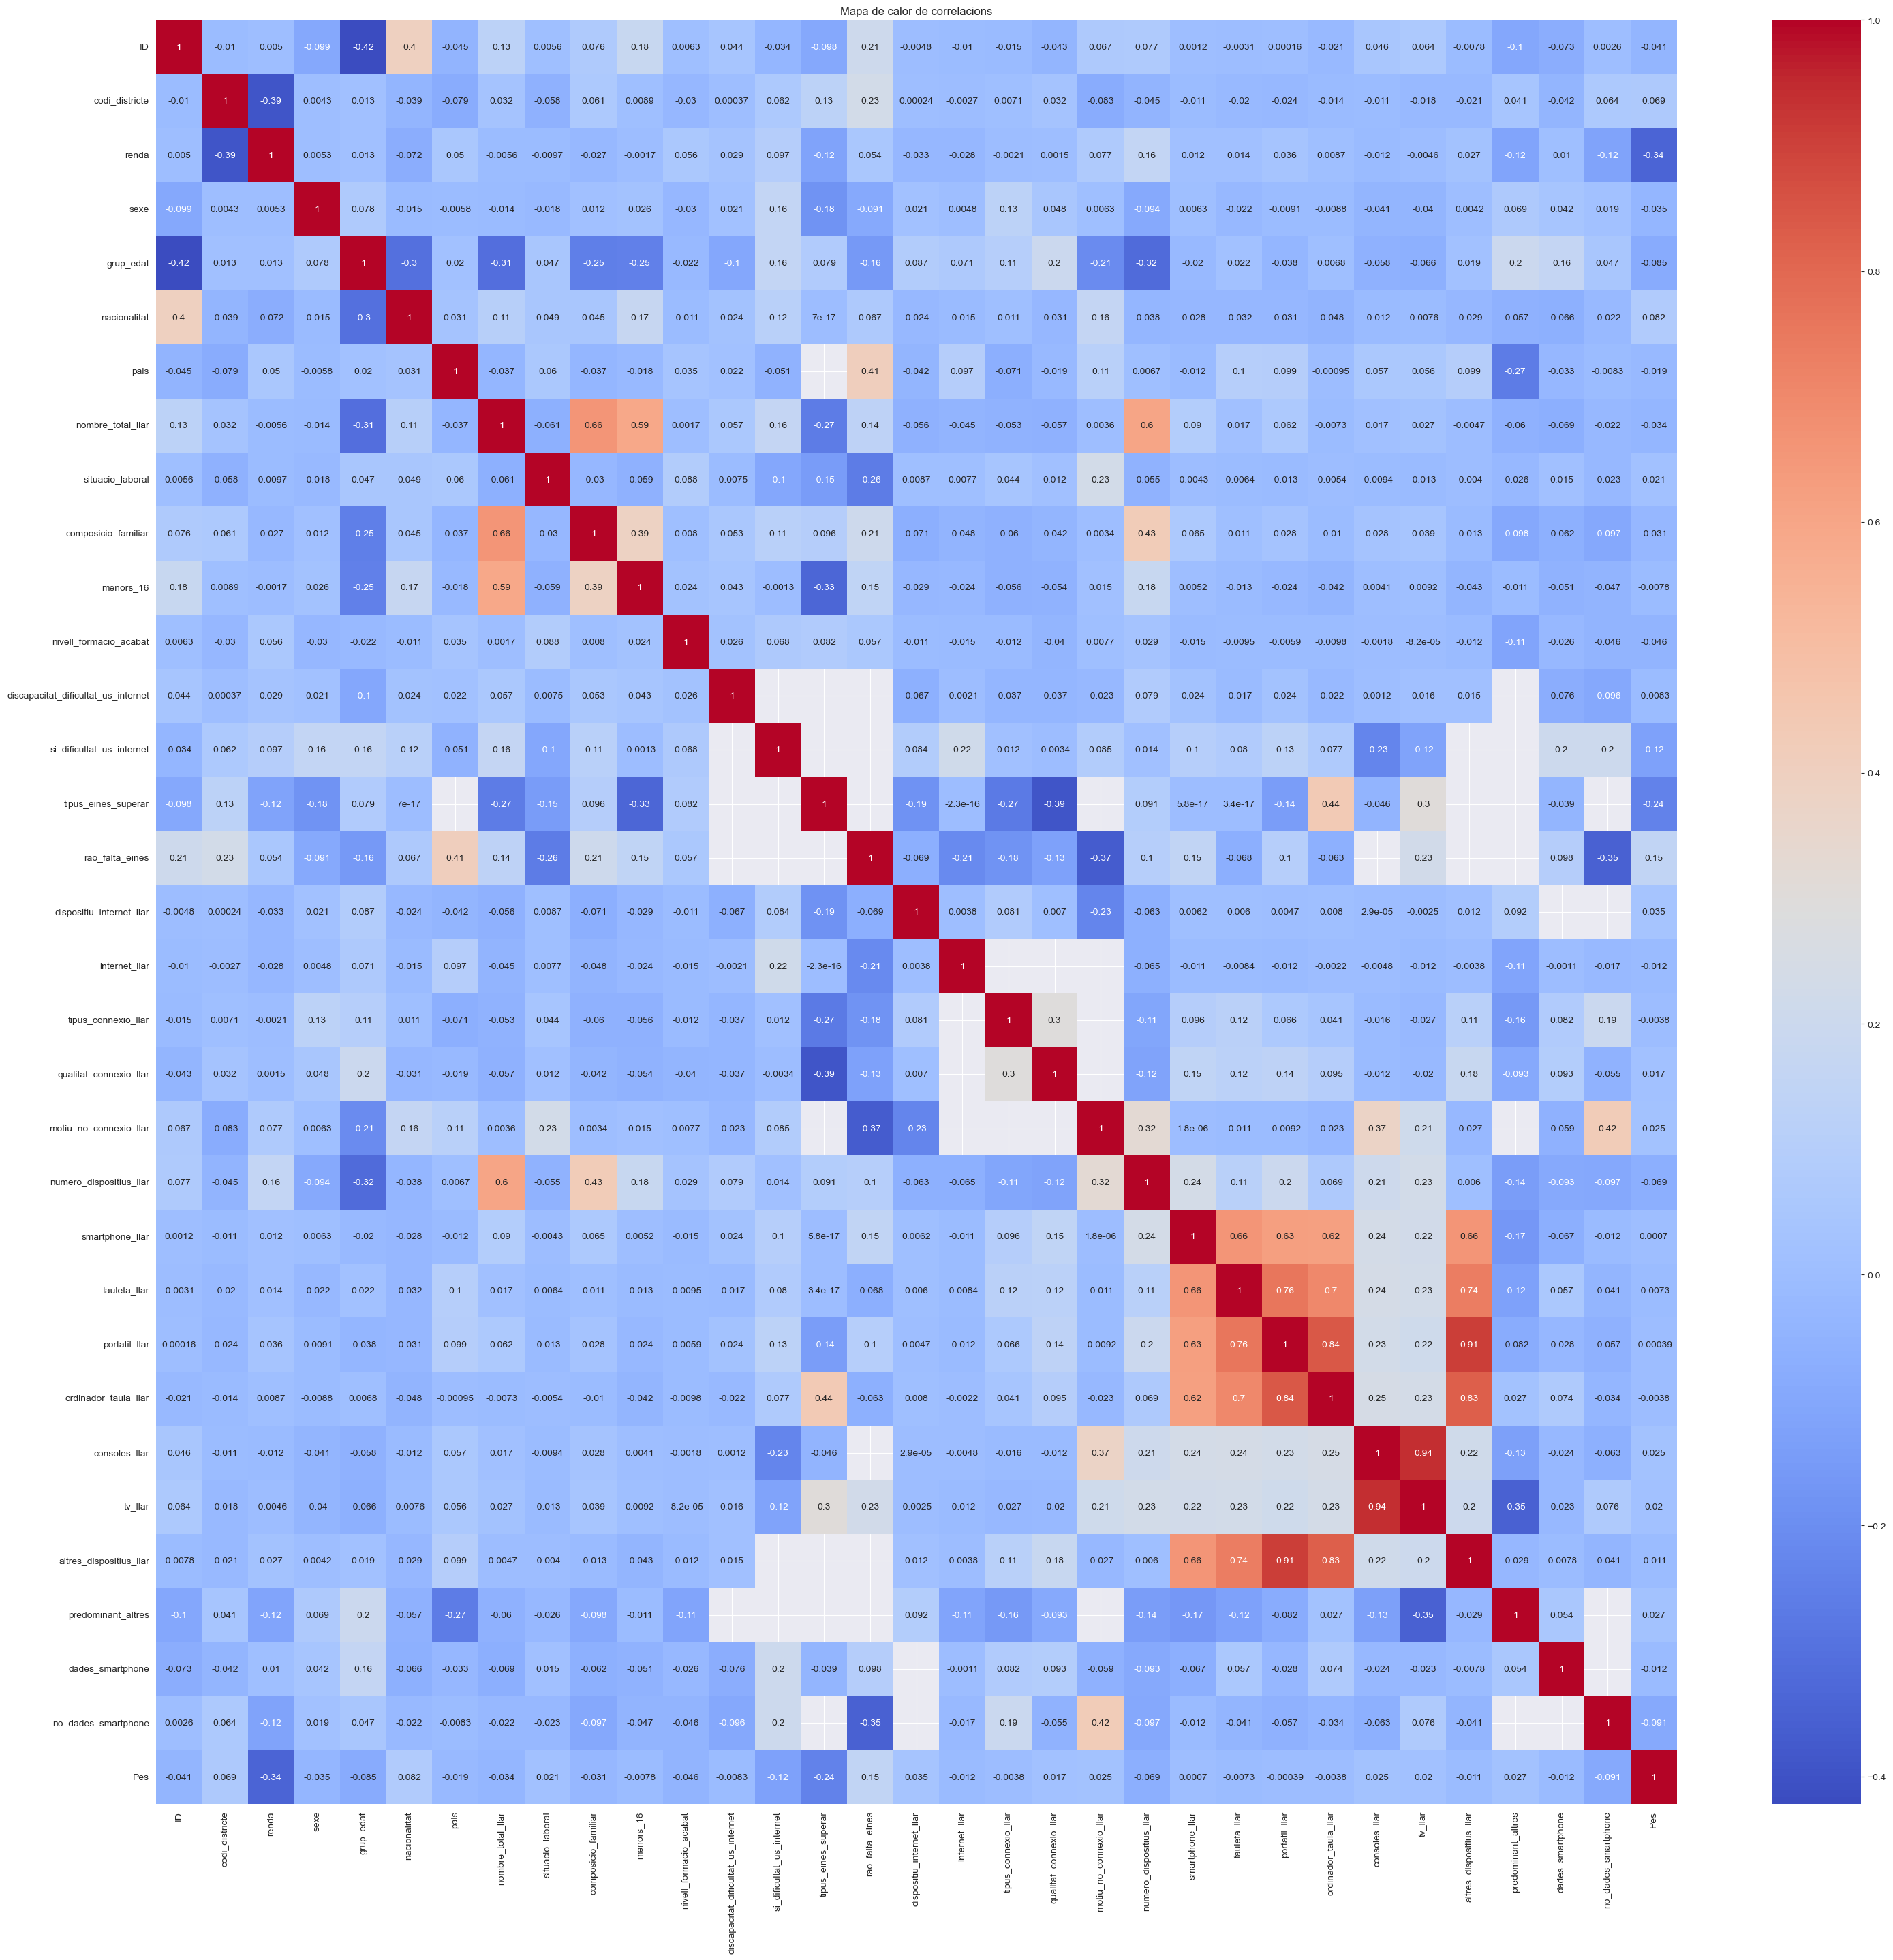

In [11]:
# Importem les llibreries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_final.corr()

# Creem un mapa de calor
plt.figure(figsize=(36, 34))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlacions")
plt.show()

Insights clau:
- Les variables relacionades amb els dispositius de la llar (com smartphone_llar, tauleta_llar, portatil_llar, ordinador_taula_llar, tv_llar, consoles_llar) estan fortament correlacionades entre si. Per exemple, la correlació entre tauleta_llar i portatil_llar és de 0.76, indicant que les llars que tenen tauletes també solen tenir portàtils. La gent 'connectada', hi està amb diferent suports i fica diners en tecnologia. 

- La correlació de 0.59 entre el nombre total de persones a la llar i el nombre de menors de 16 anys indica que llars amb més membres també solen tenir més menors. Els joves en general, han crescut o estan creixen en una societat on la tecnologia és omnipresent. 

-  Observem una correlació negativa significativa de -0.30 entre la nacionalitat i el grup d'edat. Això pot suggerir que les persones de nacionalitats estrangeres tendeixen a estar en grups d’edat més joves, mentre que les persones de nacionalitat espanyola estan més distribuïdes o en grups d’edat majors. Els estrangers poden utilitzar internet per mantenir el contacte amb les seves families, això suggeriria que és més probable que busquin a tenir accés a internet.

- Hi ha una correlació moderadament negativa de -0.39 entre la renda i el codi_districte. Això indica que, en general, en districtes amb codis més alts (com podrien ser districtes menys cèntrics o menys adinerats com Nou Barris), les rendes tendeixen a ser més baixes, mentre que en districtes amb codis més baixos (possiblement més cèntrics i de rendes més altes), les rendes tendeixen a ser més altes. Una repartició ja present a un dels documents adjunts a aquesta enquesta : en el PDF FT_Distrb_renda_20 de opendata-ajuntament.barcelona.cat. 

- Hi ha una correlació forta de 0.42 entre el motiu_no_connexio_llar i no_dades_smartphone. Això suggereix que les persones que no tenen dades al seu smartphone (per motius econòmics o perquè utilitzen altres connexions) també són més propenses a no tenir connexió a Internet a casa. Aquesta relació és la que vull explorar en més detall. 

També cal notar que hi ha 'forats' al mapa de calor, això es perquè algunes variables no són aplicables a la majoria dels enquestats (discapacitat_dificultat_us_internet i les altres relatives) i llavors no poden demostrar correlació. 

Hi ha alguna relation directa entre la rao que falta d'internet a la llar o de dades al mobil amb quin barri viu la gent?

In [12]:
# Agrupem per codi_districte i comptem els motius per no tenir connexió a la llar
motiu_connexio_per_districte = df_final.groupby(['codi_districte', 'motiu_no_connexio_llar']).size().unstack(fill_value=0)

# Agrupem per codi_districte i comptem les raons per no tenir dades al smartphone
no_dades_per_districte = df_final.groupby(['codi_districte', 'no_dades_smartphone']).size().unstack(fill_value=0)

# Visualització dels resultats
print(motiu_connexio_per_districte)
print(no_dades_per_districte)

motiu_no_connexio_llar  1.0   2.0   3.0   4.0   6.0   7.0   51.0  52.0  95.0
codi_districte                                                              
1                          0     3     0     1     3     0     0     0     1
2                          0     3     1     7    10    14     1     2     2
3                          0     1     0     2     2     5     0     0     1
4                          0     1     0     1     3     1     0     0     1
5                          0     0     0     2     2     3     0     0     2
6                          1     4     1     0    12     4     0     0     0
7                          0     1     0     3     2     6     0     1     1
8                          0    11     0     5    20    14     0     0     2
9                          1     2     0     2     6     3     0     1     1
10                         0     3     0     3     7     8     0     0     1
no_dades_smartphone  1.0   2.0   3.0   4.0   5.0   95.0  98.0
codi_districte

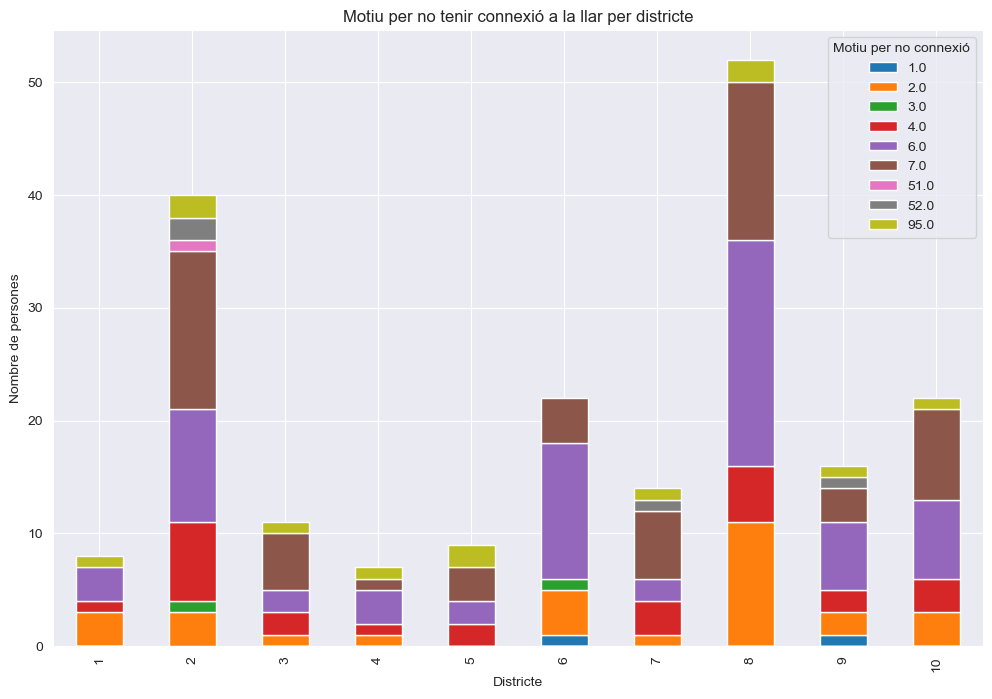

In [13]:
# Gràfic de barres per motiu de no connexió a la llar per districte
motiu_connexio_per_districte.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Motiu per no tenir connexió a la llar per districte')
plt.xlabel('Districte')
plt.ylabel('Nombre de persones')
plt.legend(title='Motiu per no connexió')
plt.show()

Abans de mirar els motius per no tenir connexió internet a la llar, podem veure que els barris de Ciutat Vella (1), Les Corts (4), Sarrià - Sant Gervasi (5) tenen proporcionalment menys de 10 persones sense internet a la llar. Un contrast ben gran amb el Nou Barris(8).

Nous Barris registra el nombre més alt de persones sense connexió a la llar. Els principals motius són:
Motiu 6: "No cal, ja que no utilitzo internet" (20 persones).
Motiu 2: "No em puc permetre pagar la connexió" (11 persones).
Motiu 7: "No sé utilitzar internet" (14 persones).
Això indica que, a Nou Barris, els factors econòmics i la manca d'ús d'internet són les raons predominants per la falta de connexió.

Eixample(2): Mostra una distribució més àmplia de motius:
Motiu 6: "No cal, ja que no utilitzo internet" (10 persones).
Motiu 7: "No sé utilitzar internet" (14 persones).
Motiu 4: "No cal, em connecto mitjançant el mòbil/tauleta" (7 persones).

Gràcia(6): Presenta un nombre notable de persones sense connexió a la llar, destacant:
Motiu 6: "No cal, ja que no utilitzo internet" (12 persones).
Motiu 2: "No em puc permetre pagar la connexió" (4 persones).
Aquí, la percepció de no necessitar internet a la llar és el principal motiu, amb una preocupació econòmica significativa.

Sant Martí(10): Similar a l'Eixample, amb una majoria que indica:
Motiu 6: "No cal, ja que no utilitzo internet" (7 persones).
Motiu 7: "No sé utilitzar internet" (8 persones).

Vale, i si mirem la distribució per la gent sense dades al mobil?

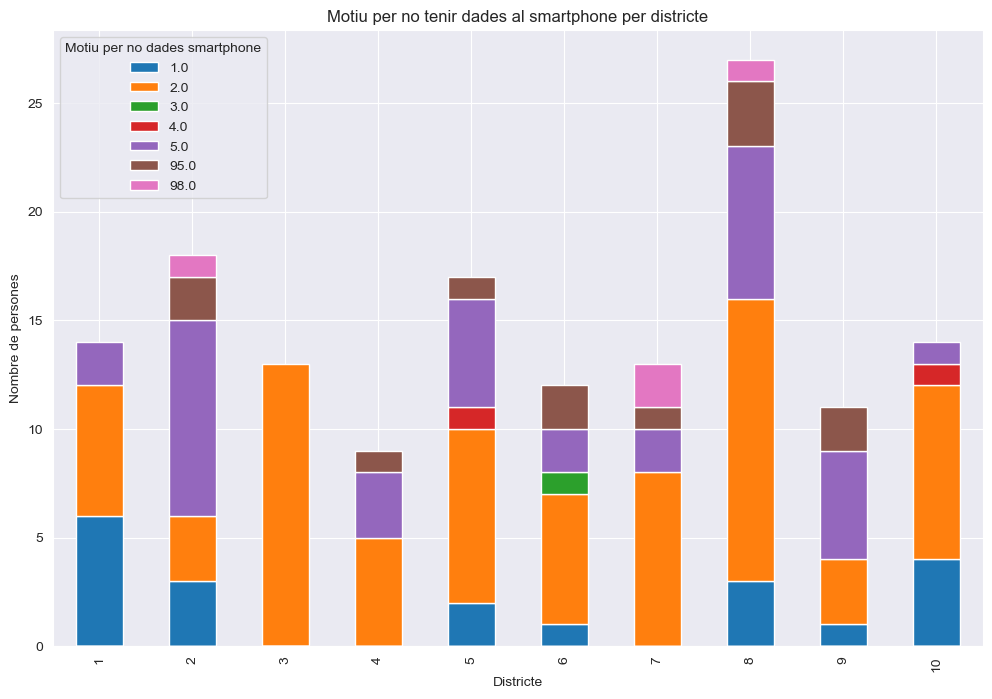

In [14]:
# Gràfic de barres per motiu de no tenir dades al smartphone per districte
no_dades_per_districte.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Motiu per no tenir dades al smartphone per districte')
plt.xlabel('Districte')
plt.ylabel('Nombre de persones')
plt.legend(title='Motiu per no dades smartphone')
plt.show()

Passem a mirar perquè algunes persones no tenen un mobil amb dades: 

- Sants - Montjuïc(3): Registra un nombre destacat de persones sense dades al smartphone, amb:
Motiu 2: "No cal, amb el wifi de casa ja tinc suficient" (13 persones).
Això indica que molts residents utilitzen el wifi de casa i no veuen la necessitat de tenir dades mòbils.

- Eixample(2): Presenta una situació diversa:
Motiu 5: "No necessito Internet al mòbil/tablet" (9 persones).
Motiu 2: "No cal, amb el wifi de casa ja tinc suficient" (3 persones).

- Nou Barris(8): Mostra una distribució similar a Sants - Montjuïc:
Motiu 2: "No cal, amb el wifi de casa ja tinc suficient" (13 persones).
Motiu 5: "No necessito Internet al mòbil/tablet" (7 persones).

- Sant Martí(10) i Ciutat Vella(1): Presenten una distribució equilibrada, amb una preferència per l'ús del wifi en comptes de dades mòbils.

Les conclusions generals que veig son les 3 següents: 
- Els factors econòmics influencien significativament la connexió a la llar i l'accés a dades mòbils, especialment a Nou Barris i Horta - Guinardó, on molts no poden pagar els serveis.
- Existeix una tendència a la falta d'ús d'internet en diversos districtes, amb persones que afirmen que no saben com utilitzar-lo.
- En districtes com Sants - Montjuïc i Nou Barris, una gran part de la població confia en el wifi de casa per accedir a internet, renunciant a les dades mòbils.

Sembla que no tothom estigui connectat.
Creieu que hi ha alguna correlació entre els barris i els grups d'edat del que no tenen dades al smartphone? 

In [15]:
# Filtrar les dades només per a aquells que no tenen dades al smartphone
df_no_dades = df_final[df_final['no_dades_smartphone'] != '']

# Agrupar per grup d'edat i codi de districte
agrupament_edat_districte = df_no_dades.groupby(['grup_edat', 'codi_districte']).size().unstack(fill_value=0)

# Visualitzar els primers resultats
print(agrupament_edat_districte.head())

codi_districte  1   2   3   4   5   6   7   8   9   10
grup_edat                                             
1               12  33  13  18  29  21  14  34  17  28
2               37  71  32  31  44  47  21  48  28  40
3               34  85  30  27  42  46  30  67  38  59
4               22  57  29  26  62  50  22  79  36  59
5               11  71  20  27  61  34  28  64  27  54


Els districtes amb més població i diversitat, com Eixample i Nou Barris, són els que tenen més persones sense dades al smartphone, especialment en els grups d'edat mitjans (25-54 anys). 

Les franges d'edat mitjanes (25-44 anys) són les que presenten les xifres més elevades de persones sense dades en la majoria dels districtes. Això podria ser degut a diverses raons: falta de necessitat d'ús de dades mòbils, ús de wifi a casa o al treball, o limitacions econòmiques.

Els grups d'edat més joves (16-24 anys) tendeixen a estar millor connectats, però encara hi ha una quantitat significativa de persones sense dades, la qual cosa indica que l'accés a Internet mitjançant el mòbil no és universal ni tan generalitzat com es podria pensar.

Aquestes dades suggereixen que les polítiques per augmentar l'accés a Internet mòbil haurien de centrar-se en els districtes i grups d'edat que mostren més dificultats, especialment en barris amb més desigualtats o més densitat de població.


i si mirem ara l'accés internet a la llar segons el grup d'edat?

In [16]:
# Filtrar les dades per aquelles persones que NO tenen internet a la llar (suponem que 2 indica "No")
df_no_internet = df_final[df_final['internet_llar'] == 2]

# Agrupar per grup d'edat i codi de districte
agrupament_edat_districte = df_no_internet.groupby(['grup_edat', 'codi_districte']).size().reset_index(name='count')

# Visualitzar les dades filtrades
print(agrupament_edat_districte.head())

   grup_edat  codi_districte  count
0          1               8      1
1          1               9      1
2          2               1      1
3          2               2      4
4          2               4      2


La manca d’accés a Internet a la llar sembla afectar especialment a persones joves, principalment en els grups d’edat 1 (16-24 anys) i 2 (25-34 anys), en particular als districtes amb més densitat de població o a zones més vulnerables com Nou Barris.

A l'Eixample(2), un dels districtes més cèntrics, la manca de connexió en el grup d’edat 2 (25-34 anys) podria estar associada amb la priorització d'altres tipus de despeses o amb el fet de no considerar necessari tenir connexió a casa si hi ha altres fonts de connectivitat disponibles (com el treball o wifi públic).

El barri de Nou Barris(8) és conegut per tenir, en general, una població amb més vulnerabilitat econòmica, cosa que podria explicar que algunes persones joves no tinguin Internet a la llar, ja que poden tenir menys capacitat econòmica per pagar aquest servei.

Sembla útil que l'ajuntament realitzi programes de subvencions o accions socials per ajudar les persones amb limitacions econòmiques.
També pot ser interessant considerar programes d'educació digital, especialment per als grups d’edat joves que podrien beneficiar-se de més informació sobre com obtenir accés a Internet de manera assequible.


***2. Implementa un pipeline que integri tant el preprocés de les dades com el modelatge. S'haurà d'avaluar almenys dos models diferents per determinar quin ofereix el millor rendiment en funció de l'estudi de les seves mètriques. Recorda avaluar si és pertinent realitzar un ajust fi dels hiperparàmetres dels models. Hauràs de justificar les teves decisions.***

Un dels grans indicadors de l'escletxa digital és si una persona té o no connexió a Internet a la llar (internet_llar). 

Per poder predir si una persona té connexió a Internet em basaré en les variables següents:
- 'renda' (nivell d’ingressos)
- 'nivell_formacio_acabat' (nivell educatiu)
- 'grup_edat' (franja d’edat)
- 'codi_districte' (zona on viu la persona)
- 'situacio_laboral' (ocupació)
per intentar identificar col·lectius vulnerables.

Aquesta seria una tasca de classificació binària, on la variable objectiu seria internet_llar (1 per Sí, 2 per No).

Models que exploraré:
Random Forest Classifier: Un model d'arbres de decisió que podria capturar bé les relacions no lineals entre les variables.
Logistic Regression: Un model estadístic que pot ser útil si les relacions entre les variables són més lineals.


In [17]:
# Llibreries necessàries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Variables rellevants per a la predicció
features = ['renda', 'nivell_formacio_acabat', 'grup_edat', 'codi_districte', 'situacio_laboral']
X = df_final[features]
y = df_final['internet_llar']  # Variable objectiu (1 per Sí, 2 per No)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valors nuls amb SimpleImputer 
imputer = SimpleImputer(strategy='most_frequent')  # O utilitzar strategy='mean' per dades numèriques
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 1. Entrenar el model de Random Forest amb class_weight='balanced'
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predir amb Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf, zero_division=0))  

# 2. Entrenar el model de Logistic Regression amb class_weight='balanced'
logreg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predir amb Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg, zero_division=0))  

Random Forest Model Evaluation:
Accuracy: 0.8467583497053045
              precision    recall  f1-score   support

           1       0.96      0.88      0.92       474
           2       0.21      0.46      0.29        35
          98       0.00      0.00      0.00         0

    accuracy                           0.85       509
   macro avg       0.39      0.44      0.40       509
weighted avg       0.91      0.85      0.87       509

Logistic Regression Model Evaluation:
Accuracy: 0.6542239685658153
              precision    recall  f1-score   support

           1       0.97      0.66      0.79       474
           2       0.11      0.51      0.18        35
          98       0.00      0.00      0.00         0

    accuracy                           0.65       509
   macro avg       0.36      0.39      0.32       509
weighted avg       0.91      0.65      0.75       509




Uh! Veiem que el Random Forest és clarament el model amb millor rendiment en general, amb una accuracy del 85% i una bona identificació de les persones amb Internet. Tanmateix, com que la classe 2 (persones sense Internet) és minoritària, el model té dificultats per predir correctament aquesta classe. Això es reflecteix en la baixa precision (0.21) i l'f1-score (0.29) per a aquesta classe.

El model de Logistic Regression té un rendiment inferior, amb una accuracy global del 65% i resultats molt pobres en la predicció de persones sense Internet, amb una precision especialment baixa (0.11) i un F1-score (0.18) per a la classe 2.

Per millorar el rendiment del model, especialment per la classe minoritària (persones sense Internet), pensaba aplicar una tècnica de sobremostreig. Aquest mètode consisteix a duplicar o generar mostres addicionals de la classe minoritària per equilibrar les classes durant l'entrenament. Això ajuda el model a tenir més informació sobre la classe minoritària i, per tant, millorar la seva capacitat de predicció.

A continuació, utilitzaré la tècnica de RandomOverSampler de la llibreria imbalanced-learn.

In [18]:
# Llibreries necessàries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler  # Per al sobremostreig

# Suposem que df_final és el teu dataset amb les columnes rellevants

# Variables rellevants per a la predicció
features = ['renda', 'nivell_formacio_acabat', 'grup_edat', 'codi_districte', 'situacio_laboral']
X = df_final[features]
y = df_final['internet_llar']  # Variable objectiu (1 per Sí, 2 per No)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valors nuls amb SimpleImputer (si hi ha valors nuls)
imputer = SimpleImputer(strategy='most_frequent')  # O utilitzar strategy='mean' per dades numèriques
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Aplicar sobremostreig amb RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# 1. Entrenar el model de Random Forest amb class_weight='balanced'
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Predir amb Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Evaluation (sobremostrejat):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf, zero_division=0))  # zero_division=0 per evitar l'advertència

# 2. Entrenar el model de Logistic Regression amb class_weight='balanced'
logreg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Predir amb Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Model Evaluation (sobremostrejat):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg, zero_division=0))  # zero_division=0 per evitar l'advertència


Random Forest Model Evaluation (sobremostrejat):
Accuracy: 0.8074656188605108
              precision    recall  f1-score   support

           1       0.96      0.83      0.89       474
           2       0.17      0.46      0.25        35
          98       0.00      0.00      0.00         0

    accuracy                           0.81       509
   macro avg       0.38      0.43      0.38       509
weighted avg       0.91      0.81      0.85       509

Logistic Regression Model Evaluation (sobremostrejat):
Accuracy: 0.6601178781925344
              precision    recall  f1-score   support

           1       0.96      0.67      0.79       474
           2       0.10      0.49      0.17        35
          98       0.00      0.00      0.00         0

    accuracy                           0.66       509
   macro avg       0.36      0.39      0.32       509
weighted avg       0.90      0.66      0.75       509



Si comparem els resultats d'abans amb els d'ara, veiem que amb el Random Forest, el sobremostreig no ha millorat substancialment el rendiment del model. Tot i que el recall per la classe minoritària (persones sense Internet) es manté, la precision ha empitjorat lleugerament. Això indica que el model continua tenint problemes per diferenciar correctament les persones sense Internet, i hi ha molts falsos positius.

El model de Regressió Logística també no ha mostrat millores significatives després del sobremostreig. L'accuracy es manté pràcticament igual, i la predicció de la classe minoritària no ha millorat en termes de precision o recall.

Sembla que he de gestionar el desbalanceig i vull probar SMOTE (Synthetic Minority Over-sampling Technique). SMOTE és una tècnica més avançada que genera noves mostres sintètiques de la classe minoritària. Això pot ser millor que el RandomOverSampler, que simplement duplica les mostres existents. 

In [19]:
pip install imbalanced-learn

In [23]:
# Importar llibreries necessàries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # Importar SMOTE

# Variables rellevants per a la predicció
features = ['renda', 'nivell_formacio_acabat', 'grup_edat', 'codi_districte', 'situacio_laboral']
X = df_final[features]
y = df_final['internet_llar']  # Variable objectiu (1 per Sí, 2 per No)

# Dividim les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valors nuls amb SimpleImputer 
imputer = SimpleImputer(strategy='most_frequent')  # O utilitzar strategy='mean' per dades numèriques
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Aplicar SMOTE per equilibrar les classes amb un nombre menor de veïns
smote = SMOTE(random_state=42, k_neighbors=1)  # Provar amb k_neighbors=1
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 1. Entrenar el model de Random Forest amb class_weight='balanced'
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Predir amb Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# 2. Entrenar el model de Logistic Regression amb class_weight='balanced'
logreg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Predir amb Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg, zero_division=0))


Random Forest Model Evaluation:
Accuracy: 0.8447937131630648
              precision    recall  f1-score   support

           1       0.95      0.88      0.91       474
           2       0.20      0.40      0.26        35
          98       0.00      0.00      0.00         0

    accuracy                           0.84       509
   macro avg       0.38      0.43      0.39       509
weighted avg       0.90      0.84      0.87       509

Logistic Regression Model Evaluation:
Accuracy: 0.6719056974459725
              precision    recall  f1-score   support

           1       0.97      0.67      0.79       474
           2       0.14      0.69      0.23        35
          98       0.00      0.00      0.00         0

    accuracy                           0.67       509
   macro avg       0.37      0.45      0.34       509
weighted avg       0.91      0.67      0.75       509



Eureka, la precisió del nou model ha augmentat de 0,6542 a 0,6719, cosa que indica un rendiment global millorat.

- La classe 1 (accés a Internet) manté una alta precisió, mentre que la memòria ha disminuït lleugerament, cosa que suggereix que encara és fiable per predir l'accés a Internet.
- La classe 2 (sense accés a Internet) mostra un record millorat (de 0,51 a 0,69), però la precisió continua sent baixa, cosa que indica que, tot i que el model és millor per identificar alguns usuaris sense accés a Internet, també pot incloure falsos positius.
- Les mètriques mitjanes ponderades indiquen que, tot i que hi ha una millora en la identificació d'usuaris sense accés a Internet, la precisió continua sent una preocupació.

El model Random Forest mostra una precisió estable amb una lleugera disminució del rendiment per a la classe 2. Continua sent eficaç per predir usuaris amb accés a Internet.
El model de regressió logística mostra una millora en la precisió i el record per a la classe 2, cosa que indica una millor identificació dels usuaris sense accés a Internet però que encara tenen problemes amb la precisió.

Recapitulem els resultats:

| Model                                | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) | Precision (Class 2) | Recall (Class 2) | F1-score (Class 2) | Weighted Avg Precision | Weighted Avg Recall |
|--------------------------------------|----------|---------------------|------------------|---------------------|---------------------|------------------|---------------------|-----------------------|---------------------|
| Random Forest                        | 0.8468   | 0.96                | 0.88             | 0.92                | 0.21                | 0.46             | 0.29                | 0.91                  | 0.85                |
| Logistic Regression                  | 0.6542   | 0.97                | 0.66             | 0.79                | 0.11                | 0.51             | 0.18                | 0.91                  | 0.65                |
| Random Forest (Sobremostrejat)       | 0.8075   | 0.96                | 0.83             | 0.89                | 0.17                | 0.46             | 0.25                | 0.91                  | 0.81                |
| Logistic Regression (Sobremostrejat) | 0.6601   | 0.96                | 0.67             | 0.79                | 0.10                | 0.49             | 0.17                | 0.90                  | 0.66                |
| Random Forest (SMOTE)                | 0.8448   | 0.95                | 0.88             | 0.91                | 0.20                | 0.40             | 0.26                | 0.90                  | 0.84                |
| Logistic Regression (SMOTE)          | 0.6719   | 0.97                | 0.67             | 0.79                | 0.14                | 0.69             | 0.23                | 0.91                  | 0.67                |


Conclusions: 

Els models de Random Forest han demostrat un rendiment superior en la predicció de l'accés a Internet en comparació amb la regressió logística. Amb una precisió superior al 84%, el model de Random Forest és més eficaç per identificar usuaris amb connexió a Internet, indicant la seva robustesa en entorns amb dades complexes.

Tots els models van mostrar dificultats significatives per identificar usuaris sense accés a Internet. La baixa precisió i recall per a la classe d'usuari sense connexió (class 2) suggereix que els factors que contribueixen a la falta de connexió poden ser més complexos o estar menys representats en les dades, reflectint la necessitat de tècniques de mostreig més sofisticades o la incorporació de variables addicionals per millorar les prediccions.

Les variables relacionades amb la renda i la situació laboral han demostrat influir significativament en l'accés a Internet. Això indica que l'accés a la tecnologia i la connectivitat estan fortament relacionats amb factors econòmics, ressaltant la importància d'adreçar les desigualtats econòmiques per millorar l'accés a serveis digitals.

Una part considerable dels enquestats depenien del wifi de casa per accedir a Internet, com es reflecteix en les respostes sobre la manca de dades mòbils. Aquesta dependència pot indicar una falta de comprensió o accés a altres opcions de connectivitat, la qual cosa podria ser una àrea clau per a futures intervencions.

Els resultats subratllen la necessitat de realitzar investigacions més aprofundides per entendre millor les dinàmiques que envolten l'accés a Internet. Incorporar més variables sociodemogràfiques i de comportament dels usuaris podria proporcionar una visió més clara sobre les barreres que impedeixen l'accés a la tecnologia.

Finalment, aquests resultats poden servir de base per a la formulació de polítiques que busquin millorar la connectivitat en els districtes amb menys accés. Viure 'connectat' segueix sent un privilegi. 